In [ ]:
!pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 38.6 MB/s eta 0:00:00


In [ ]:
!pip install astropy

In [ ]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates.matrix_utilities import rotation_matrix
from astropy.coordinates import SkyCoord, CartesianRepresentation
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
import utility as util

In [ ]:
#Initializing all the variables.

NSIDE = 4096
NPIX  = hp.nside2npix(NSIDE)

og_df = pd.read_csv('simple_model_images_files_data.csv')

2x1 shape

In [ ]:
test_data2 = {
    'up1':0,
    'dw1':1,
    'up2':0,
    'dw2':0,
    'up3':0,
    'dw3':0,
    'up4':0,
    'dw4':0,
    'up5':0,
    'dw5':0,
    'left_tr1':True,
    'left_tr2':True,
    'left_tr3':True,
    'left_tr4':True,
    'left_tr5': False,
    'shift1': 0.01,
    'shift2': 0.01,
    'shift3': 0.01,
    'shift4': 0.01,
    'shift5': 0.01,
    'pointing_num':330
}

In [ ]:
test_df2 = util.gen_tiling_customTest(og_df, test_data2)

In [ ]:
ra_cen = test_df2[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen = test_df2[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_cen}; DEC: {dec_cen}")

RA: 8.747549068557449; DEC: -45.827551827063076


# Mosaic Pattern (1,2)

### Performing calculations (Rotation Transformation) via Astropy

In [ ]:
def translate_squares_custom_2x1(df, shift=0.01):

    single_pointing = df.tail(18)
    min_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()

    ## Upward Tile (current pattern: 2x1)
    translation_distance_up = max_dec - min_dec - 0.09

    result_df = df.copy()

    translated_df = single_pointing.copy()
    translated_df[['DEC1', 'DEC2', 'DEC3', 'DEC4']] += translation_distance_up

    result_df = pd.concat([result_df, translated_df], ignore_index=True)

    return result_df

In [ ]:
test_df2 = og_df[(og_df['POINTING'] == 330)]
test_df2 = translate_squares_custom_2x1(test_df2)

In [ ]:
ra_cen = test_df2[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen = test_df2[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_cen}; DEC: {dec_cen}")

RA: 7.605339986386345; DEC: -45.38800879385636


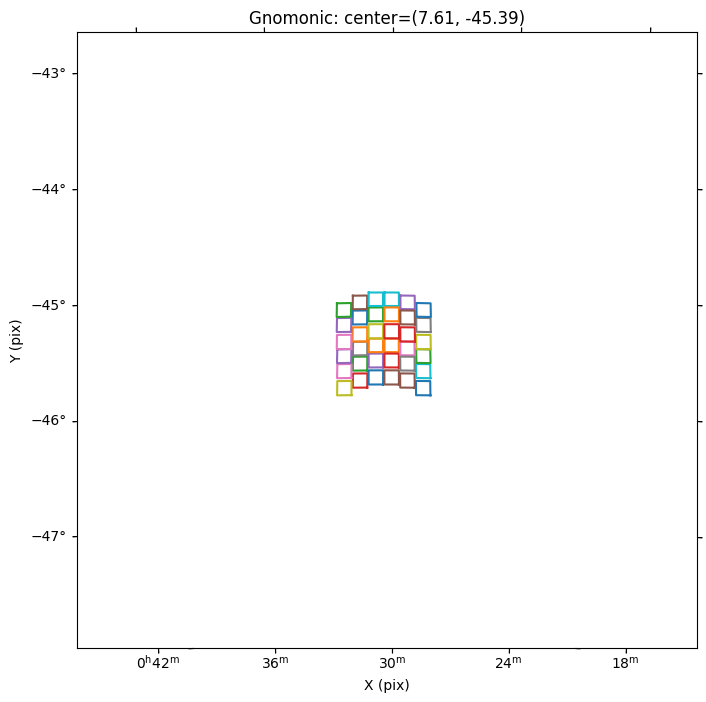

In [ ]:
## Visualization via astropy
util.visualize_astropy_plotcoord(test_df2, ra_cen, dec_cen)

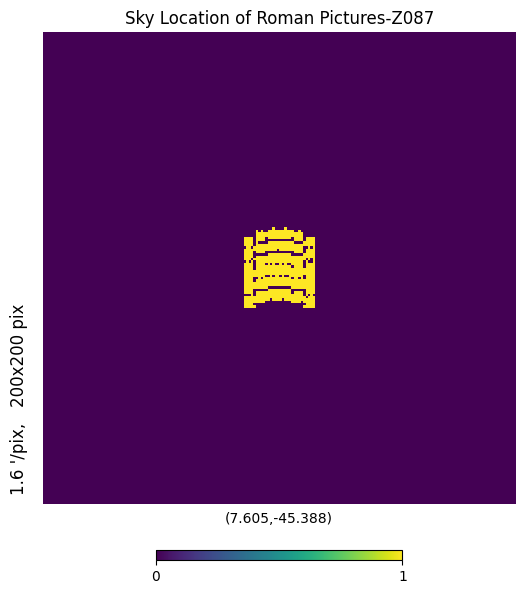

In [ ]:
## Visualization via healpix
util.visualize_healpy(test_df2, ra_cen, dec_cen)

In [ ]:
ra_custom = test_df2[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_custom = test_df2[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_custom}; DEC: {dec_custom}")

RA: 7.605339986386345; DEC: -45.38800879385636


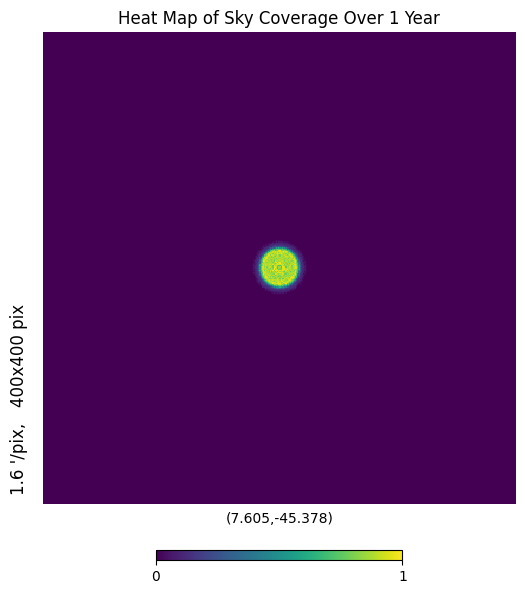

In [ ]:
heat_map = util.create_heat_map(test_df2, ra_custom, dec_custom)

In [ ]:
pixel_data = util.calculate_pixel_efficiency(test_df2, ra_custom, dec_custom)

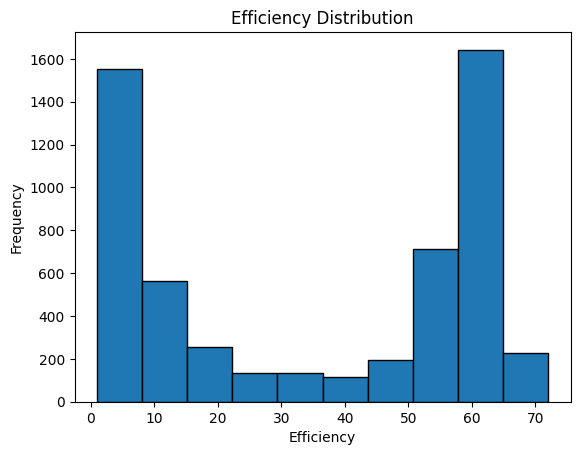

In [ ]:
efficiency_vals = [pix["appearances"] for _, pix in pixel_data.items()]

plt.hist(efficiency_vals, bins=10, edgecolor='black')
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')

plt.show()

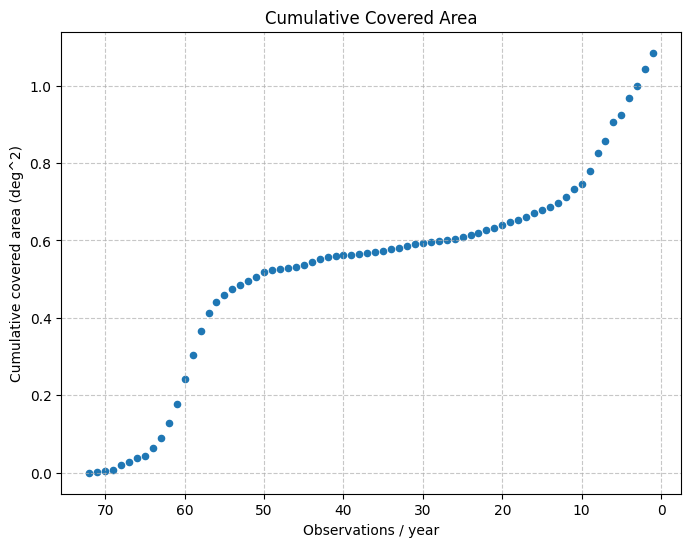

In [ ]:
from collections import Counter
pixel_freqs = []
for _, pix in pixel_data.items():
    pixel_freqs.append(pix['appearances'])

d = {}

d = Counter(pixel_freqs)
sorted_d = dict(sorted(d.items(), key=lambda x: -x[0]))
area_per_pixel = (0.014)**2
y = []
x = []
tot = 0
for k, v in sorted_d.items():
    tot += v*area_per_pixel
    y.append(tot)
    x.append(k)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', s=20)  # s controls dot size
plt.title("Cumulative Covered Area")
plt.xlabel("Observations / year")
plt.ylabel("Cumulative covered area (deg^2)")
plt.gca().invert_xaxis()  # Reverse X-axis to match earlier plot
plt.grid(True, linestyle='--', alpha=0.7)
# plt.ylim(0, 1.4)
plt.show()

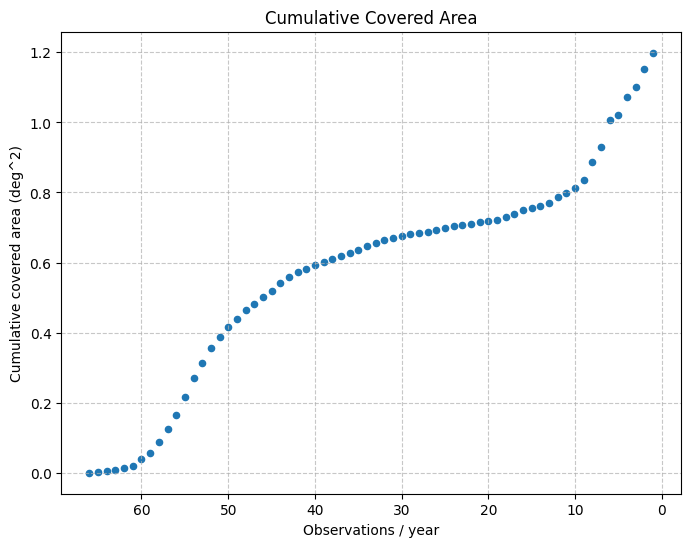

In [ ]:
from collections import Counter
pixel_freqs = []
for _, pix in pixel_data.items():
    pixel_freqs.append(pix['appearances'])

d = {}

d = Counter(pixel_freqs)
sorted_d = dict(sorted(d.items(), key=lambda x: -x[0]))
area_per_pixel = (0.014)**2
y = []
x = []
tot = 0
for k, v in sorted_d.items():
    tot += v*area_per_pixel
    y.append(tot)
    x.append(k)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', s=20)  # s controls dot size
plt.title("Cumulative Covered Area")
plt.xlabel("Observations / year")
plt.ylabel("Cumulative covered area (deg^2)")
plt.gca().invert_xaxis()  # Reverse X-axis to match earlier plot
plt.grid(True, linestyle='--', alpha=0.7)
# plt.ylim(0, 1.4)
plt.show()

In [ ]:
d

{49: 125,
 57: 197,
 58: 166,
 53: 237,
 56: 207,
 55: 232,
 51: 154,
 60: 80,
 54: 252,
 52: 195,
 59: 92,
 50: 151,
 63: 27,
 61: 51,
 62: 27,
 29: 10,
 33: 44,
 32: 61,
 36: 46,
 35: 37,
 38: 61,
 39: 52,
 42: 97,
 40: 63,
 43: 74,
 46: 97,
 44: 79,
 47: 83,
 48: 140,
 64: 11,
 45: 88,
 37: 34,
 34: 46,
 41: 58,
 30: 44,
 25: 23,
 18: 27,
 13: 38,
 27: 21,
 21: 14,
 17: 44,
 26: 28,
 8: 275,
 9: 131,
 10: 73,
 16: 55,
 19: 22,
 23: 27,
 12: 67,
 14: 42,
 15: 36,
 24: 21,
 31: 28,
 20: 15,
 28: 25,
 22: 25,
 11: 43,
 7: 204,
 5: 95,
 4: 274,
 6: 391,
 2: 282,
 3: 93,
 1: 228}

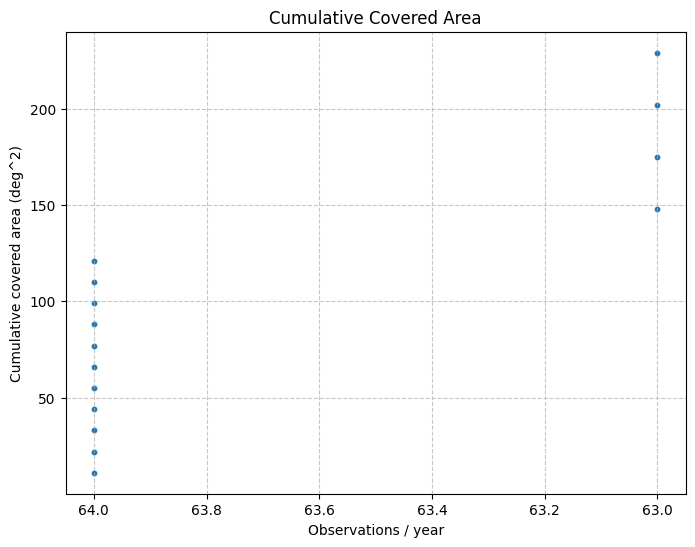

In [ ]:
pixel_freqs = []
for _, pix in pixel_data.items():
    pixel_freqs.append(pix['appearances'])

area_per_pixel = (0.014)**2

sorted_freqs = np.sort(pixel_freqs)#[::-1]

pixel_areas = sorted_freqs * area_per_pixel

# cumulative_areas = np.cumsum(pixel_areas)

d = {}
tot = 0
for pix in sorted_freqs[::-1]:
    if pix not in d:
        d[pix] = 0

    d[pix] += 1

y = []
x = []
tot = 0
for pix in sorted_freqs[::-1]:

    tot += d[pix]
    y.append(tot)
    x.append(pix)
# x = d.keys()
# y = d.values()
# y = np.cumsum(y)
x = x[:15]
y = y[:15]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', s=10)  # s controls dot size
plt.title("Cumulative Covered Area")
plt.xlabel("Observations / year")
plt.ylabel("Cumulative covered area (deg^2)")
plt.gca().invert_xaxis()  # Reverse X-axis to match earlier plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
x

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63]

In [ ]:
y

[11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 148, 175, 202, 229]

In [ ]:
pixel_data[172317639]

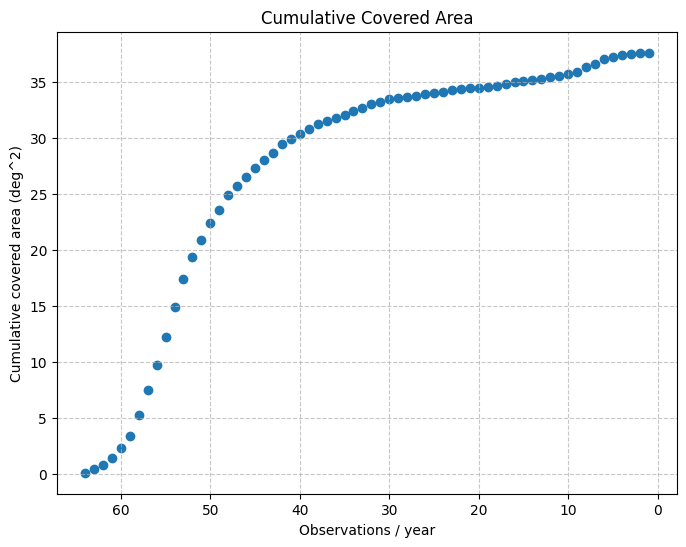

In [ ]:
util.cdf_calc(pixel_data)

### Performing calculations (Rotation Transformation) via Healpy

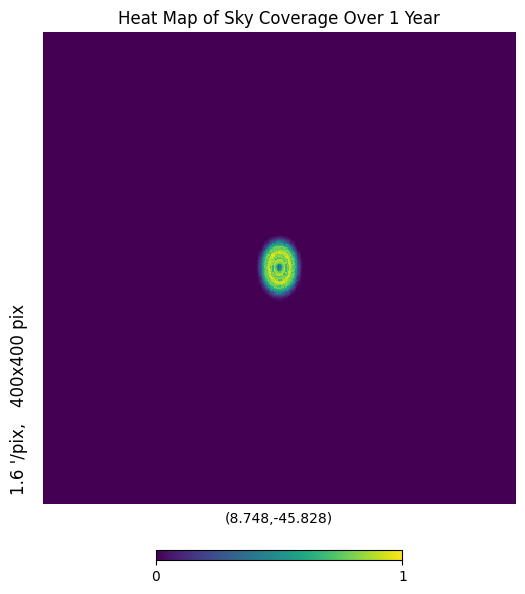

In [ ]:
heat_map = util.create_heat_map(test_df2, ra_custom, dec_custom, rot="healpy")

In [ ]:
pixel_data = util.calculate_pixel_efficiency(test_df2, ra_custom, dec_custom, rot="healpy")

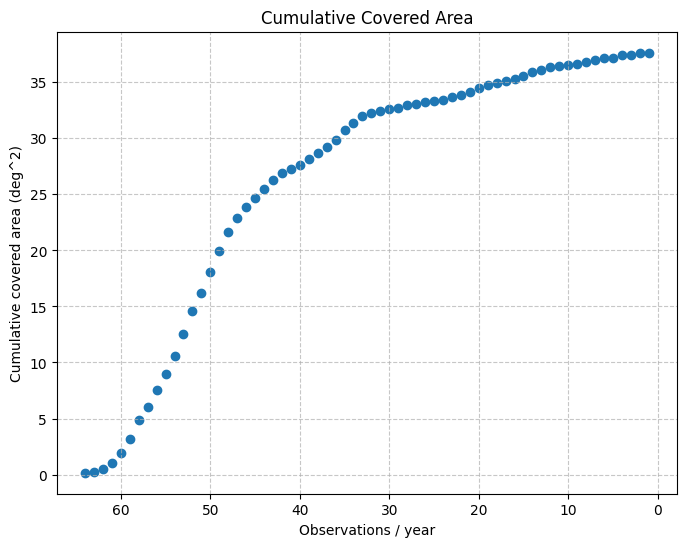

In [ ]:
util.cdf_calc(pixel_data)

# Mosaic Pattern (3,2)

In [ ]:
df = og_df[(og_df['POINTING'] == 330)]

In [ ]:
test_df3 = util.translate_squares_custom_3x2(df)

In [ ]:
def translate_squares_custom_7(df, shift=0.09):
    """
    Function to create the tiling of the footprint (3x2), following the snake pattern outlined in (Wang et al., 2023).
    Output: Original dataframe with the rows corresponding to the new pointings appended to the end.

    """

    single_pointing = df.tail(18)
    min_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()

    ## Upward Tile (current pattern: 2x1)
    translation_distance_up = max_dec - min_dec - shift

    result_df = df.copy()

    translated_df = single_pointing.copy()
    translated_df[['DEC1', 'DEC2', 'DEC3', 'DEC4']] += translation_distance_up

    result_df = pd.concat([result_df, translated_df], ignore_index=True)

    ## Upward Tile (current pattern: 2x1)
    single_pointing = result_df.tail(18)
    min_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = single_pointing[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()
    translation_distance_up = max_dec - min_dec - shift

    # result_df = df.copy()

    translated_df = single_pointing.copy()
    translated_df[['DEC1', 'DEC2', 'DEC3', 'DEC4']] += translation_distance_up

    result_df = pd.concat([result_df, translated_df], ignore_index=True)

    ## Upward Middle Tile (current pattern: 3x1)
    last_set = result_df.tail(18)

    mean_ra = last_set[['RA1', 'RA2', 'RA3', 'RA4']].mean().mean()
    max_ra = last_set[['RA1', 'RA2', 'RA3', 'RA4']].max().max()

    min_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()
    mean_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].mean().mean()

    translation_distance_left = max_ra - mean_ra
    translation_distance_up = max_dec - mean_dec  + 1*shift

    last_set_translated = last_set.copy()
    last_set_translated[['RA1', 'RA2', 'RA3', 'RA4']] += translation_distance_left
    last_set_translated[['DEC1', 'DEC2', 'DEC3', 'DEC4']] += translation_distance_up

    result_df = pd.concat([result_df, last_set_translated], ignore_index=True)

    ##Downward Tile (current pattern: 3x2 with 1 row remaining)
    last_set = result_df.tail(18)

    mean_ra = last_set[['RA1', 'RA2', 'RA3', 'RA4']].mean().mean()
    max_ra = last_set[['RA1', 'RA2', 'RA3', 'RA4']].max().max()

    min_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()
    mean_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].mean().mean()

    translation_distance_left = max_ra - mean_ra
    translation_distance_down = max_dec - mean_dec + 1*shift

    last_set_translated = last_set.copy()
    last_set_translated[['RA1', 'RA2', 'RA3', 'RA4']] += translation_distance_left
    last_set_translated[['DEC1', 'DEC2', 'DEC3', 'DEC4']] -= translation_distance_down

    result_df = pd.concat([result_df, last_set_translated], ignore_index=True)

    ##Downward Tile (current pattern: 3x2 complete)
    last_set = result_df.tail(18)
    min_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()

    translation_distance_down = max_dec - min_dec - shift
    last_set_translated = last_set.copy()
    last_set_translated[['DEC1', 'DEC2', 'DEC3', 'DEC4']] -= translation_distance_down
    result_df = pd.concat([result_df, last_set_translated], ignore_index=True)

    ##Downward Tile (current pattern: 3x2 complete)
    last_set = result_df.tail(18)
    min_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].min().min()
    max_dec = last_set[['DEC1', 'DEC2', 'DEC3', 'DEC4']].max().max()

    translation_distance_down = max_dec - min_dec - shift
    last_set_translated = last_set.copy()
    last_set_translated[['DEC1', 'DEC2', 'DEC3', 'DEC4']] -= translation_distance_down
    result_df = pd.concat([result_df, last_set_translated], ignore_index=True)

    return result_df

In [ ]:
test_df3 = translate_squares_custom_7(df)

In [ ]:
ra_cen = test_df3[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen = test_df3[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_cen}; DEC: {dec_cen}")

RA: 8.181426414154028; DEC: -45.084858794562166


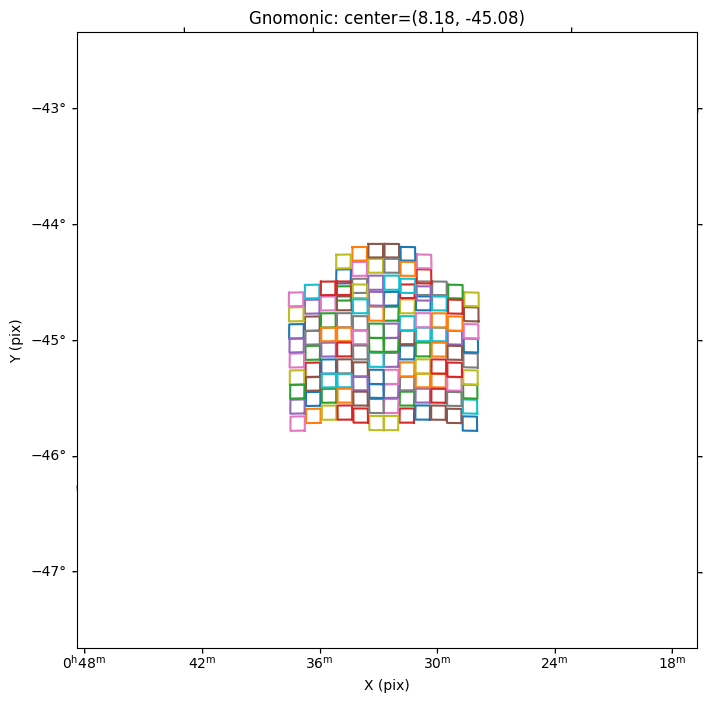

In [ ]:
#Visualization via astropy
util.visualize_astropy_plotcoord(test_df3, ra_cen, dec_cen)

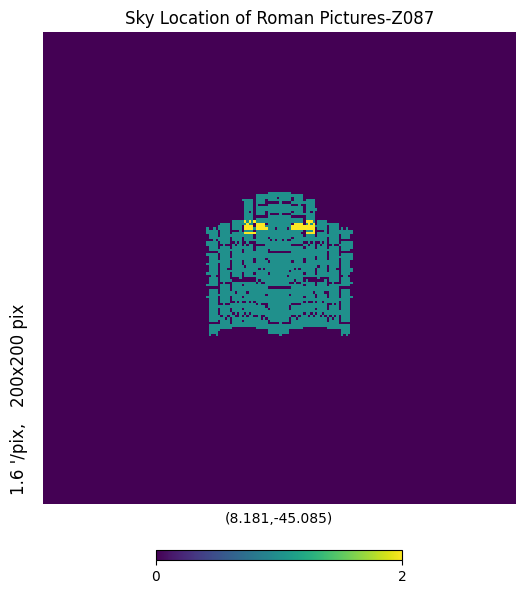

In [ ]:
#Visualization via Healpy
util.visualize_healpy(test_df3, ra_cen, dec_cen)

In [ ]:
ra_custom = test_df3[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_custom = test_df3[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_custom}; DEC: {dec_custom}")

RA: 8.181426414154028; DEC: -45.084858794562166


### Performing calculations (rotation transformation) via Astropy

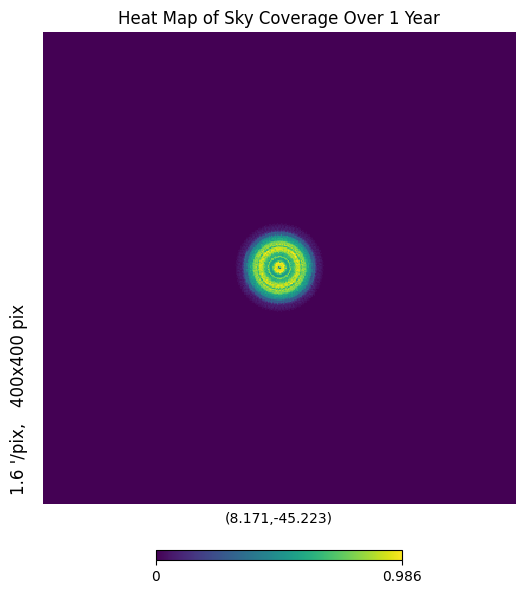

In [ ]:
heat_map = util.create_heat_map(test_df3, ra_custom, dec_custom)

In [ ]:
pixel_data = util.calculate_pixel_efficiency(test_df3, ra_custom, dec_custom)

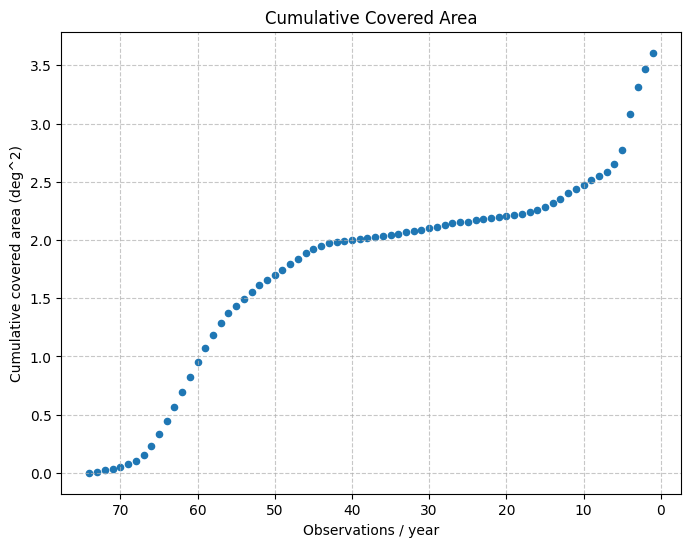

In [ ]:
from collections import Counter
pixel_freqs = []
for _, pix in pixel_data.items():
    pixel_freqs.append(pix['appearances'])

d = {}

d = Counter(pixel_freqs)
sorted_d = dict(sorted(d.items(), key=lambda x: -x[0]))
area_per_pixel = (0.014)**2
y = []
x = []
tot = 0
for k, v in sorted_d.items():
    tot += v*area_per_pixel
    y.append(tot)
    x.append(k)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', s=20)  # s controls dot size
plt.title("Cumulative Covered Area")
plt.xlabel("Observations / year")
plt.ylabel("Cumulative covered area (deg^2)")
plt.gca().invert_xaxis()  # Reverse X-axis to match earlier plot
plt.grid(True, linestyle='--', alpha=0.7)
# plt.ylim(0, 1.4)
plt.show()

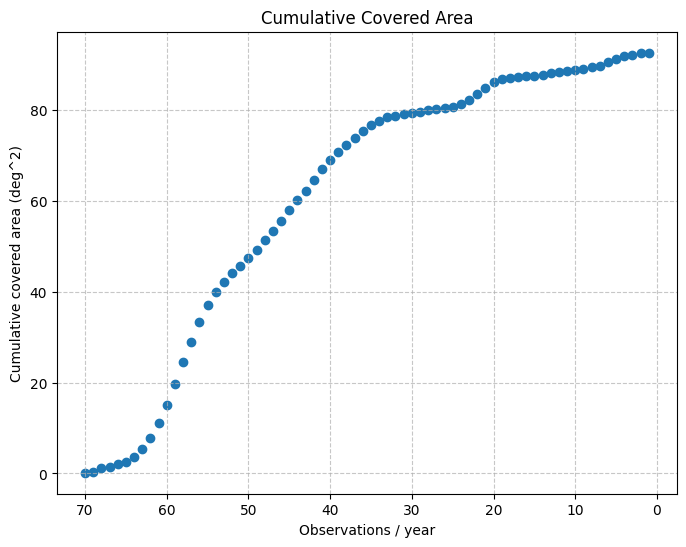

In [ ]:
util.cdf_calc(pixel_data)

### Performing calculations (rotation transformation) via Healpy

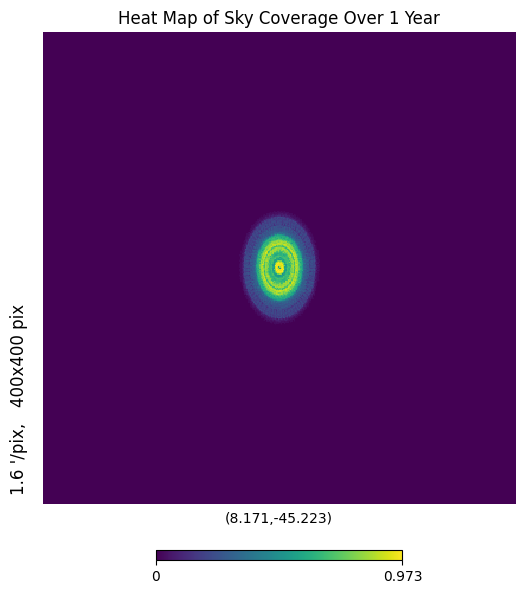

In [ ]:
heat_map = util.create_heat_map(test_df3, ra_custom, dec_custom, rot="healpy")

In [ ]:
pixel_data = util.calculate_pixel_efficiency(test_df3, ra_custom, dec_custom, rot="healpy")

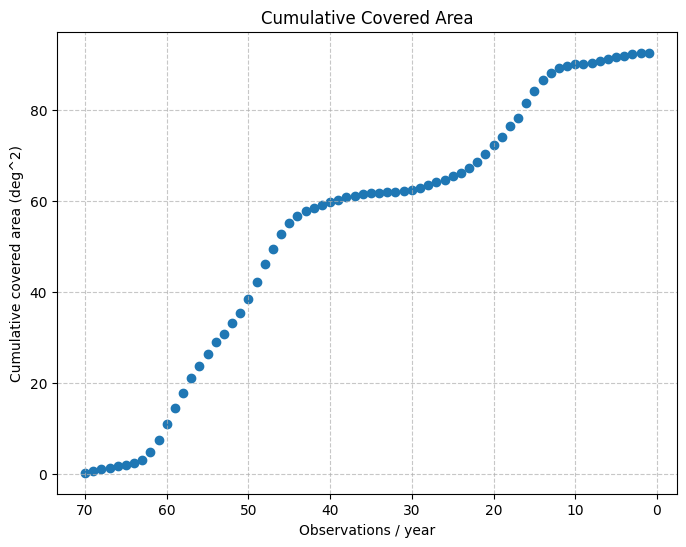

In [ ]:
util.cdf_calc(pixel_data)

# Appendix: Rotation effect (tilt/distortion) is observed differently via Astropy and Healpy



#### Using Mosaic Pattern (1,2)

In [ ]:
test_data2 = {
    'up1':0,
    'dw1':1,
    'up2':0,
    'dw2':0,
    'up3':0,
    'dw3':0,
    'up4':0,
    'dw4':0,
    'up5':0,
    'dw5':0,
    'left_tr1':True,
    'left_tr2':True,
    'left_tr3':True,
    'left_tr4':True,
    'left_tr5': False,
    'shift1': 0.01,
    'shift2': 0.01,
    'shift3': 0.01,
    'shift4': 0.01,
    'shift5': 0.01,
    'pointing_num':330
}

test_df2 = util.gen_tiling_customTest(og_df, test_data2)

ra_cen = test_df2[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen = test_df2[[f'DEC{i}' for i in range(1, 5)]].mean().mean()
print(f"RA: {ra_cen}; DEC: {dec_cen}")

RA: 8.747549068557449; DEC: -45.827551827063076


#### 45 deg rotation via center (RA_mean, Dec_mean) using Astropy

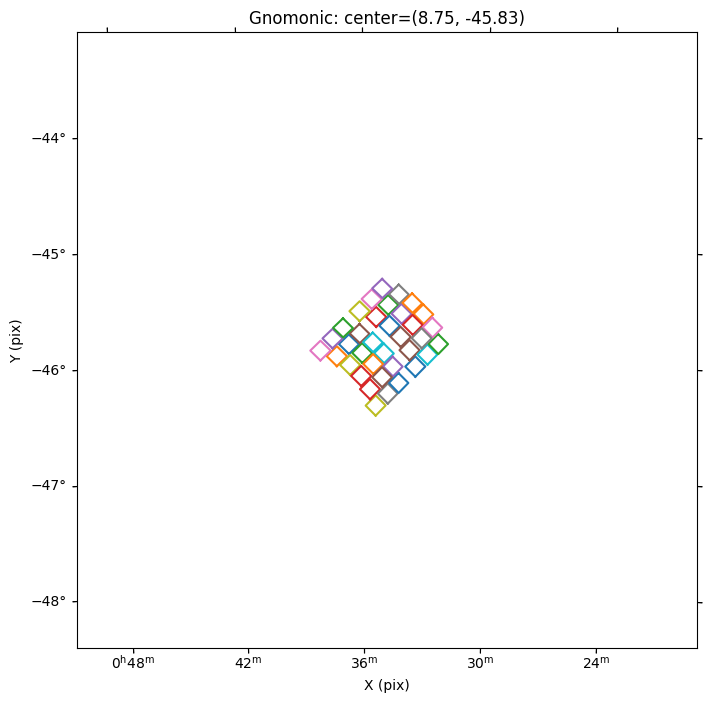

In [ ]:
rot_df = util.rotate_squares_custom_astropy(test_df2, 45, ra_cen, dec_cen)
util.visualize_astropy_plotcoord(rot_df, ra_cen, dec_cen)

#### 45 deg rotation via center (RA_mean, Dec_mean) using Healpy

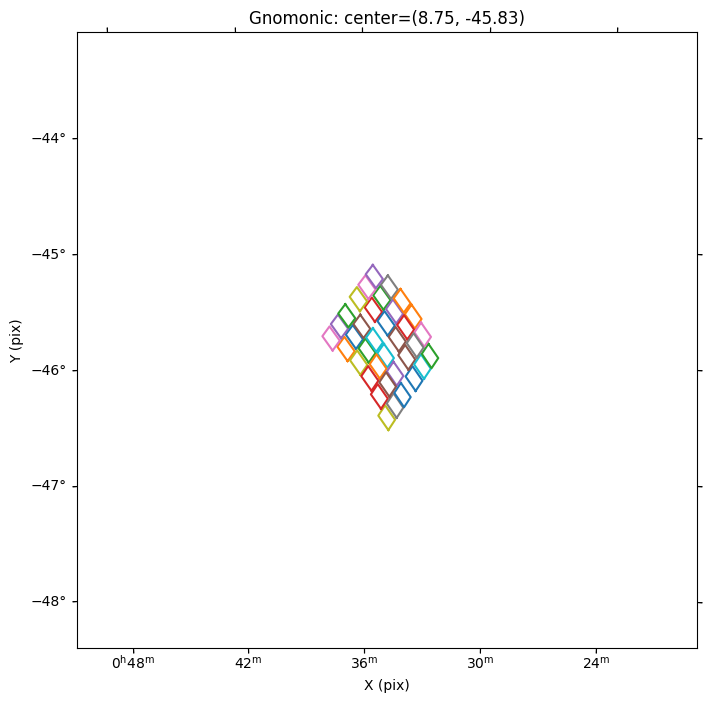

In [ ]:
rot_df = util.rotate_squares_custom_healpy(test_df2, 45, ra_cen, dec_cen)
util.visualize_astropy_plotcoord(rot_df, ra_cen, dec_cen)